Deep Learning Models -- A collection of various deep learning architectures, models, and tips for TensorFlow and PyTorch in Jupyter Notebooks.
- Author: Sebastian Raschka
- GitHub Repository: https://github.com/rasbt/deeplearning-models

In [1]:
!git config --global --unset https.proxy
!git clone https://github.com/jiajinghu19/BDL-OOD.git

Cloning into 'BDL-OOD'...
remote: Enumerating objects: 144, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 144 (delta 38), reused 125 (delta 23), pack-reused 0
Receiving objects: 100% (144/144), 7.37 MiB | 21.70 MiB/s, done.
Resolving deltas: 100% (38/38), done.


In [2]:
import os
import time

import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Subset

from torchvision import datasets
from torchvision import transforms

import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

# from utils.load_data import load_data

if torch.cuda.is_available():
    torch.backends.cudnn.deterministic = True

## Model Settings

In [3]:
##########################
### SETTINGS
##########################

# Hyperparameters
RANDOM_SEED = 1
LEARNING_RATE = 0.0001
BATCH_SIZE = 128
NUM_EPOCHS = 10

# Architecture
NUM_CLASSES = 10

# Other
DEVICE = "cuda:0"
# DEVICE = "cpu"
GRAYSCALE = True
DATASET = "SVHN"


if DATASET in ["MNIST", "FashionMNIST"]:
    S = 28 
else:
    S = 32

### MNIST Dataset

In [4]:
train_indices = torch.arange(0, 59000)
valid_indices = torch.arange(59000, 60000)

resize_transform = transforms.Compose([
                        transforms.CenterCrop((S)),
                        transforms.ToTensor(), torch.round])

# TODO use load_data utility instead of this stuff here
# train_loader, train_eval_loader, test_loader_in, test_loader_out = load_data(DATASET, BATCH_SIZE, BATCH_SIZE, S)

train_and_valid = datasets.MNIST(root='data', 
                                #  train=True, 
                                 transform=resize_transform,
                                 download=True)

test_dataset = datasets.MNIST(root='data', 
                            #   train=False, 
                              transform=resize_transform,
                              download=True)

train_dataset = Subset(train_and_valid, train_indices)
valid_dataset = Subset(train_and_valid, valid_indices)

train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=BATCH_SIZE,
                          num_workers=4,
                          shuffle=True)

valid_loader = DataLoader(dataset=valid_dataset, 
                          batch_size=BATCH_SIZE,
                          num_workers=4,
                          shuffle=False)

test_loader = DataLoader(dataset=test_dataset, 
                         batch_size=BATCH_SIZE,
                         num_workers=4,
                         shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [5]:
device = torch.device(DEVICE)
torch.manual_seed(0)

for epoch in range(2):

    for batch_idx, (x, y) in enumerate(train_loader):
        
        print('Epoch:', epoch+1, end='')
        print(' | Batch index:', batch_idx, end='')
        print(' | Batch size:', y.size()[0])
        
        x = x.to(device)
        y = y.to(device)
        break

Epoch: 1 | Batch index: 0 | Batch size: 128
Epoch: 2 | Batch index: 0 | Batch size: 128


In [6]:
# Check that shuffling works properly
# i.e., label indices should be in random order.
# Also, the label order should be different in the second
# epoch.

for images, labels in train_loader:  
    pass
print(labels[:10])

for images, labels in train_loader:  
    pass
print(labels[:10])

tensor([3, 0, 1, 7, 9, 8, 4, 4, 0, 5])
tensor([9, 9, 9, 3, 8, 1, 5, 1, 6, 7])


In [7]:
# Check that validation set and test sets are diverse
# i.e., that they contain all classes

for images, labels in valid_loader:  
    pass
print(labels[:10])

for images, labels in test_loader:  
    pass
print(labels[:10])

tensor([2, 2, 0, 9, 4, 0, 1, 2, 3, 4])
tensor([3, 4, 5, 6, 7, 8, 9, 0, 1, 2])


In [26]:
for dirname, _, filenames in os.walk('/kaggle/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/lib/kaggle/gcp.py
/kaggle/working/__notebook_source__.ipynb
/kaggle/working/BDL-OOD/README.md
/kaggle/working/BDL-OOD/environment.yml
/kaggle/working/BDL-OOD/.gitignore
/kaggle/working/BDL-OOD/main.py
/kaggle/working/BDL-OOD/src/VAE/vae.py
/kaggle/working/BDL-OOD/src/VAE/.gitkeep
/kaggle/working/BDL-OOD/src/ODIN/generate_ROC_PR_curves.py
/kaggle/working/BDL-OOD/src/ODIN/.gitkeep
/kaggle/working/BDL-OOD/src/ODIN/Densenet_Train_SVHN_4.3_Percent_Error.pth
/kaggle/working/BDL-OOD/src/ODIN/Densenet_Train_SVHN_Kaggle.ipynb
/kaggle/working/BDL-OOD/src/ODIN/Train_CIFAR-10_Test_SVHN/confidence_Base_In.txt
/kaggle/working/BDL-OOD/src/ODIN/Train_CIFAR-10_Test_SVHN/ODIN_Kaggle_Train_CIFAR-10_Test_SVHN_Cropped.ipynb
/kaggle/working/BDL-OOD/src/ODIN/Train_CIFAR-10_Test_SVHN/confidence_Our_In.txt
/kaggle/working/BDL-OOD/src/ODIN/Train_CIFAR-10_Test_SVHN/pr_curve.png
/kaggle/working/BDL-OOD/src/ODIN/Train_CIFAR-10_Test_SVHN/roc_curve.png
/kaggle/working/BDL-OOD/src/ODIN/Train_CIFAR-10_Test_SVH

In [12]:
os.chdir('/kaggle/working/BDL-OOD/')

In [13]:
##########################
### MODEL
##########################

# The following code cell that implements the DenseNet-121 architecture 
# is a derivative of the code provided at 
# https://github.com/pytorch/vision/blob/master/torchvision/models/densenet.py

import re
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.checkpoint as cp
from collections import OrderedDict



def _bn_function_factory(norm, relu, conv):
    def bn_function(*inputs):
        concated_features = torch.cat(inputs, 1)
        bottleneck_output = conv(relu(norm(concated_features)))
        return bottleneck_output

    return bn_function


class _DenseLayer(nn.Sequential):
    def __init__(self, num_input_features, growth_rate, bn_size, drop_rate, memory_efficient=False):
        super(_DenseLayer, self).__init__()
        self.add_module('norm1', nn.BatchNorm2d(num_input_features)),
        self.add_module('relu1', nn.ReLU(inplace=True)),
        self.add_module('conv1', nn.Conv2d(num_input_features, bn_size *
                                           growth_rate, kernel_size=1, stride=1,
                                           bias=False)),
        self.add_module('norm2', nn.BatchNorm2d(bn_size * growth_rate)),
        self.add_module('relu2', nn.ReLU(inplace=True)),
        self.add_module('conv2', nn.Conv2d(bn_size * growth_rate, growth_rate,
                                           kernel_size=3, stride=1, padding=1,
                                           bias=False)),
        self.drop_rate = drop_rate
        self.memory_efficient = memory_efficient

    def forward(self, *prev_features):
        bn_function = _bn_function_factory(self.norm1, self.relu1, self.conv1)
        if self.memory_efficient and any(prev_feature.requires_grad for prev_feature in prev_features):
            bottleneck_output = cp.checkpoint(bn_function, *prev_features)
        else:
            bottleneck_output = bn_function(*prev_features)
        new_features = self.conv2(self.relu2(self.norm2(bottleneck_output)))
        if self.drop_rate > 0:
            new_features = F.dropout(new_features, p=self.drop_rate,
                                     training=self.training)
        return new_features


class _DenseBlock(nn.Module):
    def __init__(self, num_layers, num_input_features, bn_size, growth_rate, drop_rate, memory_efficient=False):
        super(_DenseBlock, self).__init__()
        for i in range(num_layers):
            layer = _DenseLayer(
                num_input_features + i * growth_rate,
                growth_rate=growth_rate,
                bn_size=bn_size,
                drop_rate=drop_rate,
                memory_efficient=memory_efficient,
            )
            self.add_module('denselayer%d' % (i + 1), layer)

    def forward(self, init_features):
        features = [init_features]
        for name, layer in self.named_children():
            new_features = layer(*features)
            features.append(new_features)
        return torch.cat(features, 1)


class _Transition(nn.Sequential):
    def __init__(self, num_input_features, num_output_features):
        super(_Transition, self).__init__()
        self.add_module('norm', nn.BatchNorm2d(num_input_features))
        self.add_module('relu', nn.ReLU(inplace=True))
        self.add_module('conv', nn.Conv2d(num_input_features, num_output_features,
                                          kernel_size=1, stride=1, bias=False))
        self.add_module('pool', nn.AvgPool2d(kernel_size=2, stride=2))


class DenseNet121(nn.Module):
    r"""Densenet-BC model class, based on
    `"Densely Connected Convolutional Networks" <https://arxiv.org/pdf/1608.06993.pdf>`_

    Args:
        growth_rate (int) - how many filters to add each layer (`k` in paper)
        block_config (list of 4 ints) - how many layers in each pooling block
        num_init_featuremaps (int) - the number of filters to learn in the first convolution layer
        bn_size (int) - multiplicative factor for number of bottle neck layers
          (i.e. bn_size * k features in the bottleneck layer)
        drop_rate (float) - dropout rate after each dense layer
        num_classes (int) - number of classification classes
        memory_efficient (bool) - If True, uses checkpointing. Much more memory efficient,
          but slower. Default: *False*. See `"paper" <https://arxiv.org/pdf/1707.06990.pdf>`_
    """

    def __init__(self, growth_rate=32, block_config=(6, 12, 24, 16),
                 num_init_featuremaps=64, bn_size=4, drop_rate=0, num_classes=1000, memory_efficient=False,
                 grayscale=False):

        super(DenseNet121, self).__init__()

        # First convolution
        if grayscale:
            in_channels=1
        else:
            in_channels=3
        
        self.features = nn.Sequential(OrderedDict([
            ('conv0', nn.Conv2d(in_channels=in_channels, out_channels=num_init_featuremaps,
                                kernel_size=7, stride=2,
                                padding=3, bias=False)), # bias is redundant when using batchnorm
            ('norm0', nn.BatchNorm2d(num_features=num_init_featuremaps)),
            ('relu0', nn.ReLU(inplace=True)),
            ('pool0', nn.MaxPool2d(kernel_size=3, stride=2, padding=1)),
        ]))

        # Each denseblock
        num_features = num_init_featuremaps
        for i, num_layers in enumerate(block_config):
            block = _DenseBlock(
                num_layers=num_layers,
                num_input_features=num_features,
                bn_size=bn_size,
                growth_rate=growth_rate,
                drop_rate=drop_rate,
                memory_efficient=memory_efficient
            )
            self.features.add_module('denseblock%d' % (i + 1), block)
            num_features = num_features + num_layers * growth_rate
            if i != len(block_config) - 1:
                trans = _Transition(num_input_features=num_features,
                                    num_output_features=num_features // 2)
                self.features.add_module('transition%d' % (i + 1), trans)
                num_features = num_features // 2

        # Final batch norm
        self.features.add_module('norm5', nn.BatchNorm2d(num_features))

        # Linear layer
        self.classifier = nn.Linear(num_features, num_classes)

        # Official init from torch repo.
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        features = self.features(x)
        out = F.relu(features, inplace=True)
        out = F.adaptive_avg_pool2d(out, (1, 1))
        out = torch.flatten(out, 1)
        logits = self.classifier(out)
        probas = F.softmax(logits, dim=1)
        return logits, probas


In [14]:
torch.manual_seed(RANDOM_SEED)

model = DenseNet121(num_classes=NUM_CLASSES, grayscale=GRAYSCALE)
model.to(DEVICE)

optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)  

## Training

In [15]:
def compute_acc(model, data_loader, device):
    correct_pred, num_examples = 0, 0
    model.eval()
    for i, (features, targets) in enumerate(data_loader):
            
        features = features.to(device)
        targets = targets.to(device)

        logits, probas = model(features)
        _, predicted_labels = torch.max(probas, 1)
        num_examples += targets.size(0)
        assert predicted_labels.size() == targets.size()
        correct_pred += (predicted_labels == targets).sum()
    return correct_pred.float()/num_examples * 100

In [17]:
start_time = time.time()

cost_list = []
train_acc_list, valid_acc_list = [], []


for epoch in range(NUM_EPOCHS):
    
    model.train()
    for batch_idx, (features, targets) in enumerate(train_loader):
        
        features = features.to(DEVICE)
        targets = targets.to(DEVICE)
            
        ### FORWARD AND BACK PROP
        logits, probas = model(features)
        cost = F.cross_entropy(logits, targets)
        optimizer.zero_grad()
        
        cost.backward()
        
        ### UPDATE MODEL PARAMETERS
        optimizer.step()
        
        #################################################
        ### CODE ONLY FOR LOGGING BEYOND THIS POINT
        ################################################
        cost_list.append(cost.item())
        if not batch_idx % 150:
            print (f'Epoch: {epoch+1:03d}/{NUM_EPOCHS:03d} | '
                   f'Batch {batch_idx:03d}/{len(train_loader):03d} |' 
                   f' Cost: {cost:.4f}')

        

    model.eval()
    with torch.set_grad_enabled(False): # save memory during inference
        
        train_acc = compute_acc(model, train_loader, device=DEVICE)
        valid_acc = compute_acc(model, valid_loader, device=DEVICE)
        
        print(f'Epoch: {epoch+1:03d}/{NUM_EPOCHS:03d}\n'
              f'Train ACC: {train_acc:.2f} | Validation ACC: {valid_acc:.2f}')
        
        train_acc_list.append(train_acc)
        valid_acc_list.append(valid_acc)
        
    elapsed = (time.time() - start_time)/60
    print(f'Time elapsed: {elapsed:.2f} min')
  
elapsed = (time.time() - start_time)/60
print(f'Total Training Time: {elapsed:.2f} min')

Epoch: 001/010 | Batch 000/461 | Cost: 2.3862
Epoch: 001/010 | Batch 150/461 | Cost: 0.4016
Epoch: 001/010 | Batch 300/461 | Cost: 0.0876
Epoch: 001/010 | Batch 450/461 | Cost: 0.2306
Epoch: 001/010
Train ACC: 97.85 | Validation ACC: 97.30
Time elapsed: 2.24 min
Epoch: 002/010 | Batch 000/461 | Cost: 0.1187
Epoch: 002/010 | Batch 150/461 | Cost: 0.0975
Epoch: 002/010 | Batch 300/461 | Cost: 0.0461
Epoch: 002/010 | Batch 450/461 | Cost: 0.0287
Epoch: 002/010
Train ACC: 99.28 | Validation ACC: 97.70
Time elapsed: 4.45 min
Epoch: 003/010 | Batch 000/461 | Cost: 0.0444
Epoch: 003/010 | Batch 150/461 | Cost: 0.0208
Epoch: 003/010 | Batch 300/461 | Cost: 0.0245
Epoch: 003/010 | Batch 450/461 | Cost: 0.0606
Epoch: 003/010
Train ACC: 99.57 | Validation ACC: 97.60
Time elapsed: 6.62 min
Epoch: 004/010 | Batch 000/461 | Cost: 0.0134
Epoch: 004/010 | Batch 150/461 | Cost: 0.0534
Epoch: 004/010 | Batch 300/461 | Cost: 0.0249
Epoch: 004/010 | Batch 450/461 | Cost: 0.1165
Epoch: 004/010
Train ACC: 9

hi


## Evaluation

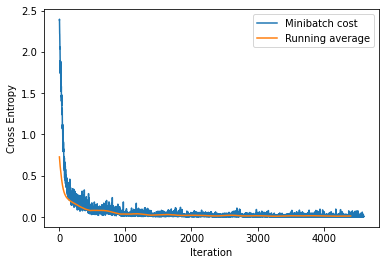

In [19]:
plt.plot(cost_list, label='Minibatch cost')
plt.plot(np.convolve(cost_list, 
                     np.ones(200,)/200, mode='valid'), 
         label='Running average')

plt.ylabel('Cross Entropy')
plt.xlabel('Iteration')
plt.legend()
plt.show()


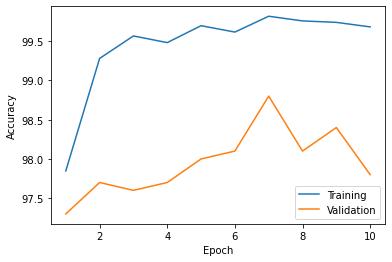

In [28]:
from torch import Tensor

plt.plot(np.arange(1, NUM_EPOCHS+1), torch.tensor(train_acc_list, device = 'cpu'), label='Training')
plt.plot(np.arange(1, NUM_EPOCHS+1), torch.tensor(valid_acc_list, device = 'cpu'), label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
with torch.set_grad_enabled(False):
    test_acc = compute_acc(model=model,
                           data_loader=test_loader,
                           device=DEVICE)
    
    valid_acc = compute_acc(model=model,
                            data_loader=valid_loader,
                            device=DEVICE)
    

print(f'Validation ACC: {valid_acc:.2f}%')
print(f'Test ACC: {test_acc:.2f}%')

/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Validation ACC: 97.80%
Test ACC: 99.65%


In [30]:
torch.save(model.state_dict(), 'DenseNet_Train_MNIST_99.65%_ACC.pth')

In [31]:
for dirname, _, filenames in os.walk('/kaggle/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/lib/kaggle/gcp.py
/kaggle/working/__notebook_source__.ipynb
/kaggle/working/BDL-OOD/.gitignore
/kaggle/working/BDL-OOD/main.py
/kaggle/working/BDL-OOD/README.md
/kaggle/working/BDL-OOD/DenseNet_Train_MNIST_99.65%_ACC.pth
/kaggle/working/BDL-OOD/environment.yml
/kaggle/working/BDL-OOD/data/models/.gitkeep
/kaggle/working/BDL-OOD/data/training/.gitkeep
/kaggle/working/BDL-OOD/data/samples/.gitkeep
/kaggle/working/BDL-OOD/utils/generate_plots.py
/kaggle/working/BDL-OOD/utils/load_data.py
/kaggle/working/BDL-OOD/src/VAE/.gitkeep
/kaggle/working/BDL-OOD/src/VAE/vae.py
/kaggle/working/BDL-OOD/src/densenet.pytorch_fork/train.py
/kaggle/working/BDL-OOD/src/densenet.pytorch_fork/densenet.py
/kaggle/working/BDL-OOD/src/densenet.pytorch_fork/.gitignore
/kaggle/working/BDL-OOD/src/densenet.pytorch_fork/make_graph.py
/kaggle/working/BDL-OOD/src/densenet.pytorch_fork/README.md
/kaggle/working/BDL-OOD/src/densenet.pytorch_fork/compute_dataset_means_stds.py
/kaggle/working/BDL-OOD/src/densenet

In [37]:
os.chdir('/kaggle/working/BDL-OOD/')
from IPython.display import FileLink
FileLink(r'/kaggle/working/BDL-OOD/DenseNet_Train_MNIST_99.65%_ACC.pth')

/kaggle/working/BDL-OOD/DenseNet_Train_MNIST_99.65%_ACC.pth